# Spotify Data Analysis

## Objective

<b>This in-depth analytical study aims to provide useful insights on various factors which influence a song in becoming a hit and their interdependencies and also puts forward important strategies and methodologies that could help artists orient their creative inputs in line with the insights derived, so that their songs are more likely to become successful.</b>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Merging all csv files into one file

In [2]:
files = [file for file in os.listdir('/Users/aravindnambiar/Desktop/Spotify Data')]

all_year_data=pd.DataFrame()

del(files[1])

for file in files:
    df=pd.read_csv('/Users/aravindnambiar/Desktop/Spotify Data/'+ file)
    all_year_data=pd.concat([all_year_data,df])


all_year_data.to_csv("all_data.csv",index=False)

### Reading the file into updated dataframe

In [3]:
all_data=pd.read_csv('all_data.csv')
all_data.head()

track           artist  \
0                                     Misty Roses  Astrud Gilberto   
1                                      Never Ever       All Saints   
2                                     Soul Sermon    Gregg Karukas   
3                       Clarinet Marmalade - Live    Alton Purnell   
4  До смерті і довше - Drum & Base and Rock Remix         Skryabin   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:50RBM1j1Dw7WYmsGsWg9Tm         0.527   0.316    1   -15.769   
1  spotify:track:5FTz9qQ94PyUHETyAyfYZN         0.738   0.541    1    -5.485   
2  spotify:track:6m24oe3lk1UMxq9zq4iPFi         0.736   0.419    0   -10.662   
3  spotify:track:5FOXuiLI6knVtgMUjWKj6x         0.565   0.594    5   -13.086   
4  spotify:track:6CxyIPTqSPvAPXfrIZczs4         0.513   0.760    4   -10.077   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0310      0.693000           0.00699    0.1680    0.543   
1     1       0.0311      0.559000           0.00000    0.0492    0.309   
2     1       0.0300      0.693000           0.49500    0.0809    0.265   
3     1       0.0646      0.655000           0.92600    0.6750    0.763   
4     1       0.0355      0.000017           0.00339    0.1530    0.961   

     tempo  duration_ms  time_signature  chorus_hit  sections  target  
0  116.211       158840               4    53.89523         6       0  
1  134.187       387573               4    32.16853        16       1  
2   93.982       237267               4    42.05369         9       0  
3  114.219       375933               4    80.99693        10       0  
4  153.166       430653               4    25.57331        20       0

### Checking General Characteristics of the Data Frame

In [4]:
all_data.shape

(41106, 19)

In [5]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float6

In [6]:
# Checking for null values

all_data.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [7]:
# Converting duration from milliseconds to seconds

all_data['duration_ms']=(all_data['duration_ms']/1000)
all_data.rename(columns={'duration_ms' : 'duration_s'},inplace=True)

In [8]:
# Time Signature = 0 is an erranious value. Hence dropping such columns as below

all_data=all_data[all_data['time_signature']!=0]

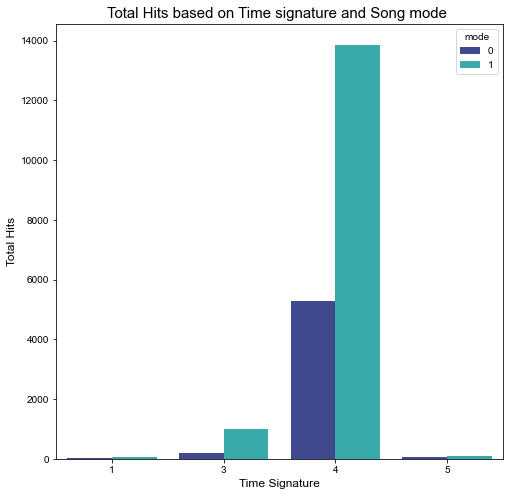

In [9]:
# Total Hits based on Time signature and Song mode

df_temp=all_data.groupby(['time_signature','mode']).sum()['target']
df_temp=df_temp.reset_index()

plt.figure(figsize=(8,8))

sns.barplot(x='time_signature',y='target',data=df_temp,hue='mode',palette='mako',saturation=1.2)

sns.set_style('whitegrid')

plt.xlabel('Time Signature',fontsize=12)
plt.ylabel('Total Hits',fontsize=12)
plt.title('Total Hits based on Time signature and Song mode ',fontsize=15)
plt.show()

### Insights:

* <b>4/4 Time signature is most likely to give a hit in both major and minor modes.</b>

* <b>Major mode is the most popular in all time signatures.</b>

* <b>A song in 4/4 Time signature and major mode is the best combination to give a hit.</b>

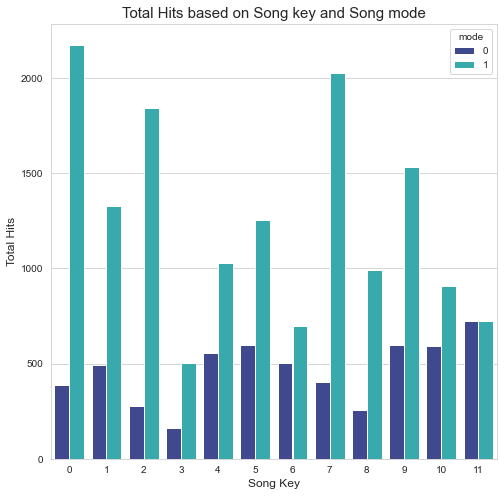

In [10]:
#Total Hits based on Song key and Song mode 

df_temp=all_data.groupby(['key','mode']).sum()['target']
df_temp=df_temp.reset_index()

plt.figure(figsize=(8,8))

sns.barplot(x='key',y='target',data=df_temp,hue='mode',palette='mako',saturation=1.2)

sns.set_style('whitegrid')

plt.xlabel('Song Key',fontsize=12)
plt.ylabel('Total Hits',fontsize=12)
plt.title('Total Hits based on Song key and Song mode',fontsize=15)
plt.show()

### Insights:


* <b>The most popular song keys are C, G, D, A, C# respectively and all are in major modes.</b>

* <b>For a minor mode song, choosing the key as B is most likely to give a hit; as likely as for a song in major mode for the same key.</b>

* <b>A song with key as D# is least likely to give a hit in both the minor as well as the major mode.</b>



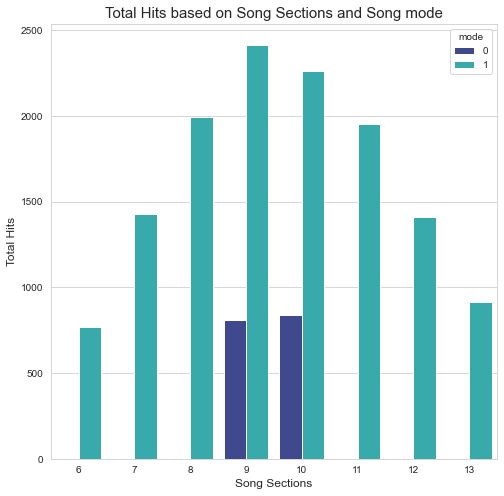

In [11]:
# Total Hits based on Song Sections and Song mode

df_temp=all_data.groupby(['mode','sections']).sum()['target'].sort_values(ascending=False).head(10)

df_temp=df_temp.reset_index()

plt.figure(figsize=(8,8))

sns.barplot(x='sections',y='target',data=df_temp,hue='mode',palette='mako',saturation=1.2)

sns.set_style('whitegrid')

plt.xlabel('Song Sections',fontsize=12)
plt.ylabel('Total Hits',fontsize=12)
plt.title('Total Hits based on Song Sections and Song mode',fontsize=15)
plt.show()


### Insights:

* <b>The optimum number of sections for a popular song is between 8-11 with 9 being the most popular. </b>

* <b>For a minor mode song, choosing 9 or 10 sections is most likely to give a hit, with 10 being slightly more than 9.</b>

* <b>Since the graph only shows top 10 optimum number of sections for a hit, choosing a song between 6-13 sections as shown is more likely to give a hit when compared to the rest.</b>




### Key Insight:

### Based on the above three visualisations, a song with C major as key, time signature as 4/4 with 9 sections is most likely  the best possible combination to give a hit

### Top Artists over the Years (1960-2019)

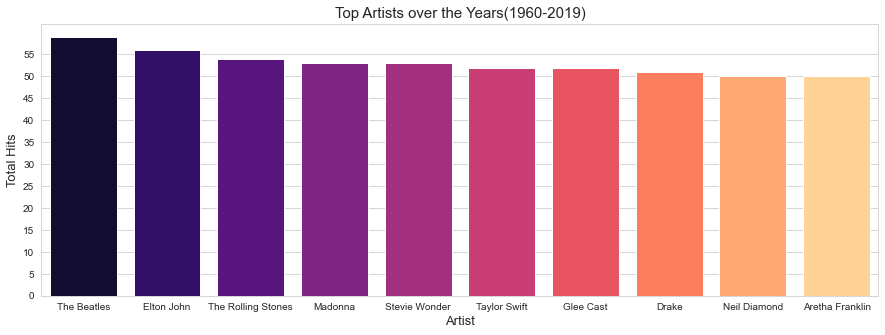

In [12]:

df_temp=all_data.groupby('artist').sum()['target'].sort_values(ascending=False).head(10)

df_temp=df_temp.reset_index()

plt.figure(figsize=(15,5))

sns.barplot(x='artist',y='target',data=df_temp,palette='magma',saturation=1.2)

sns.set_style('whitegrid')
plt.yticks(range(0,60,5))
plt.xlabel('Artist',fontsize=13)
plt.ylabel('Total Hits',fontsize=13)
plt.title('Top Artists over the Years(1960-2019)',fontsize=15)
plt.show()



### Factors Influencing a Hit Song and its Interdependencies

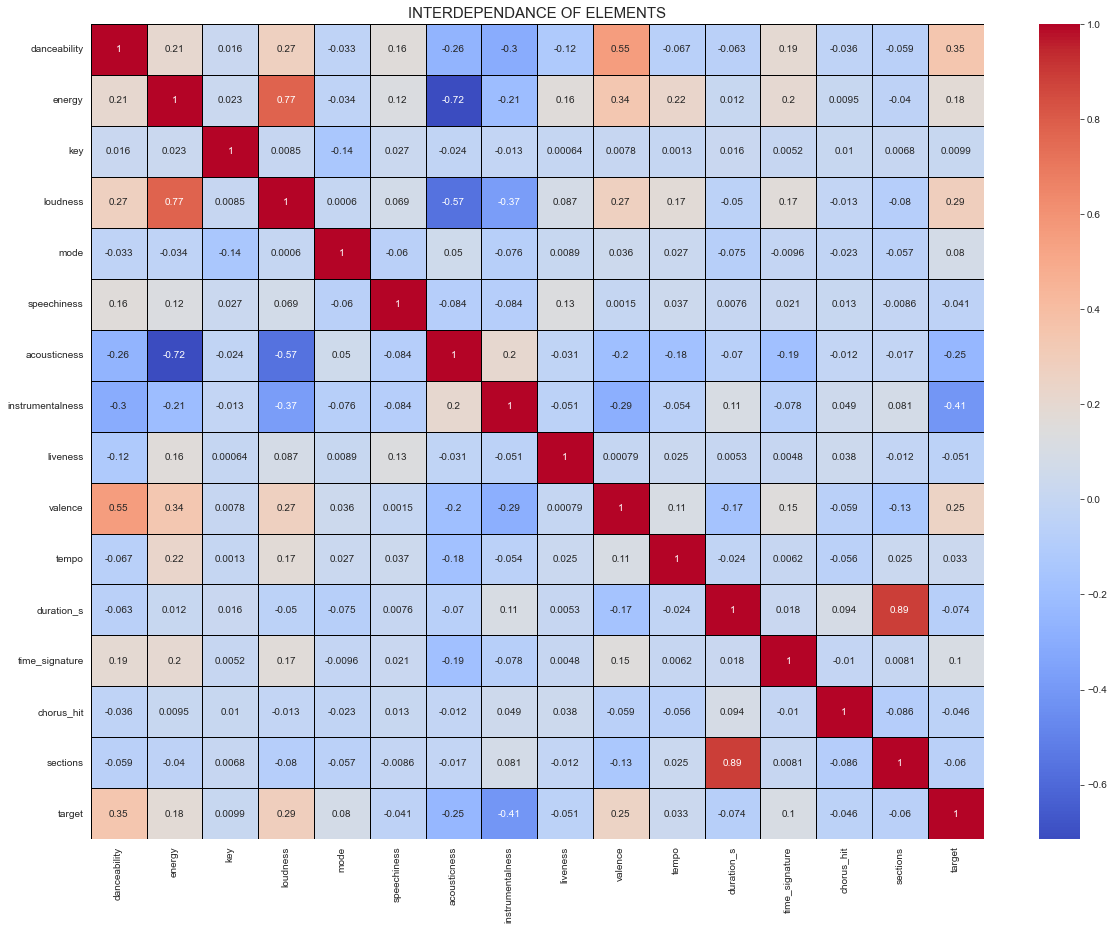

In [13]:
df_temp=all_data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(df_temp,cmap='coolwarm',annot=True,linewidths=0.8,linecolor='black')

plt.title('INTERDEPENDANCE OF ELEMENTS',fontsize=15)
plt.show()


## Danceability :

* <b>Danceability has a relatively mild positive correlation with speechiness, time signature, energy and loudness whereas it exhibits a relatively strong positive correlation with the target and valence features. </b>
* <b>Danceability has a relatively mild negative correlation with liveness, acousticness and instrumentalness. </b>

* <b>Interestingly, Danceability shows almost no correlation with factors such as tempo, key, mode and song duration.
</b>





### Mild Positive Correlations

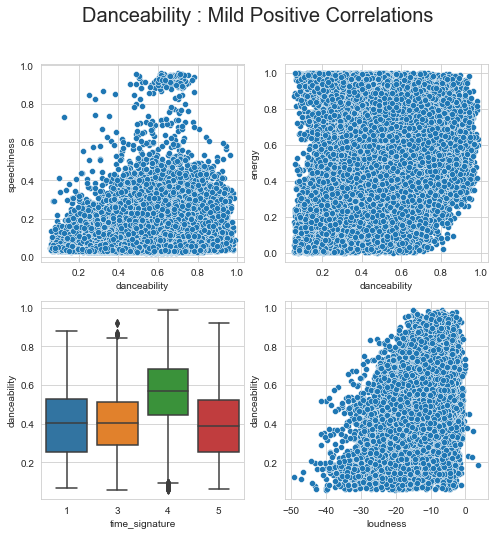

In [14]:
figure,axes= plt.subplots(2,2,figsize=(8,8))

sns.scatterplot(x='danceability',y='speechiness',data=all_data,ax=axes[0,0])
sns.scatterplot(x='danceability',y='energy',data=all_data,ax=axes[0,1])
sns.boxplot(x='time_signature',y='danceability',data=all_data,ax=axes[1,0])
sns.scatterplot(x='loudness',y='danceability',data=all_data,ax=axes[1,1])

plt.suptitle('Danceability : Mild Positive Correlations',fontsize=20)

plt.show()


### Insights:

* <b> If you want to add more danceability to a song, slightly adding/increasing speechiness will help. </b>

* <b>Adding more energy to the song will also help in its danceability as expected.</b>

* <b>Most of the songs having high danceability have a time signature of 4/4.</b>

* <b> Increasing the loudness of the song will undoubtedly add its danceability value.</b>




### Strong Positive Correlations

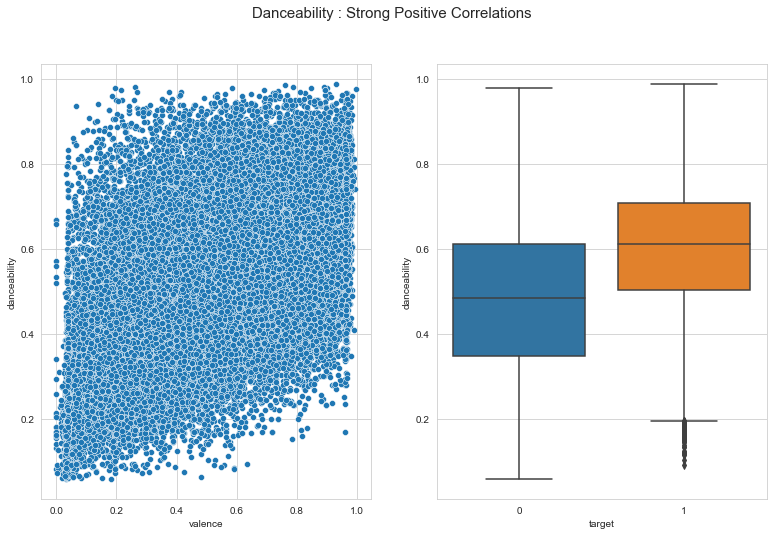

In [15]:
figure,axes= plt.subplots(1,2,figsize=(13,8))

sns.scatterplot(x='valence',y='danceability',data=all_data,ax=axes[0])
sns.boxplot(x='target',y='danceability',data=all_data,ax=axes[1])

plt.suptitle('Danceability : Strong Positive Correlations',fontsize=15)

plt.show()



### Insights:

* <b> Setting the mood of the song to a more happy, cheerful and euphoric vibe (valence value) will undoubdetly add to its danceability factor. </b>

* <b>Adding more danceability factor also implies higher chances of the song being a hit. </b>






### Mild Negative Correlations

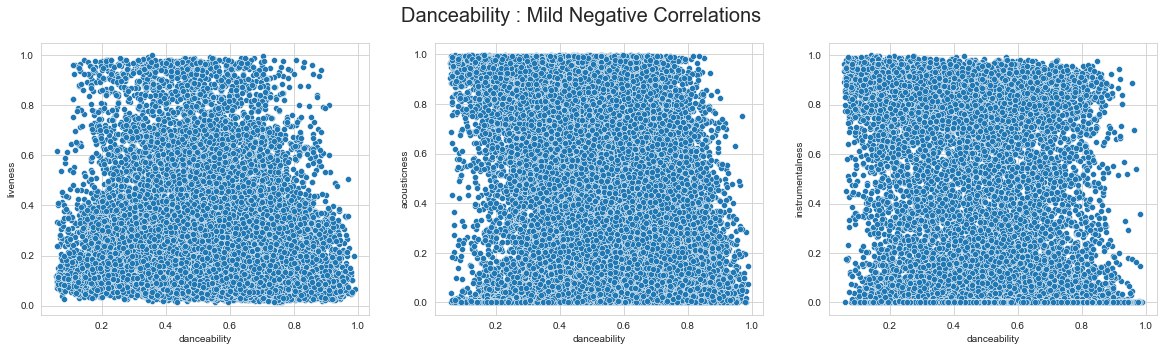

In [16]:
figure,axes= plt.subplots(1,3,figsize=(20,5))

sns.scatterplot(x='danceability',y='liveness',data=all_data,ax=axes[0])
sns.scatterplot(x='danceability',y='acousticness',data=all_data,ax=axes[1])
sns.scatterplot(x='danceability',y='instrumentalness',data=all_data,ax=axes[2])


plt.suptitle('Danceability : Mild Negative Correlations',fontsize=20)

plt.show()

### Insights:

* <b> Liveness factor for a song decreases as danceability increases (approaches 1.0). </b>

* <b>Acousticness is lesser for a song with high danceability factor. </b>

* <b>Instrumentalness is also lesser for a song with high danceability factor.</b>







### No Correlations

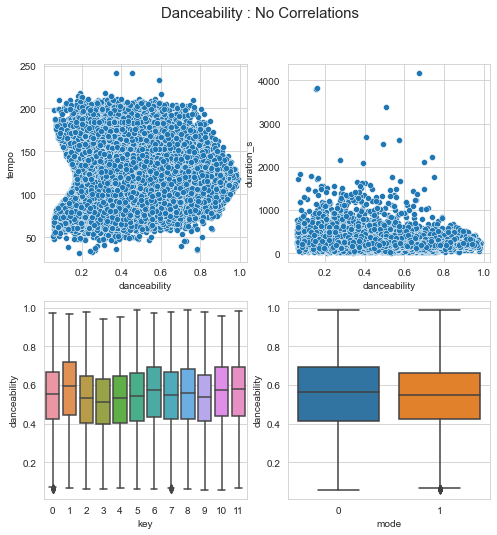

In [17]:
figure,axes= plt.subplots(2,2,figsize=(8,8))

sns.scatterplot(x='danceability',y='tempo',data=all_data,ax=axes[0,0])
sns.scatterplot(x='danceability',y='duration_s',data=all_data,ax=axes[0,1])
sns.boxplot(x='key',y='danceability',data=all_data,ax=axes[1,0])
sns.boxplot(x='mode',y='danceability',data=all_data,ax=axes[1,1])





plt.suptitle('Danceability : No Correlations',fontsize=15)

plt.show()



### Insights:

* <b>In contrary to the popular notion, tempo does not have any influence on danceability factor of a song. </b>

* <b>Danceability also remains almost unaffected by Song key, Song mode as well as Song duration. </b>





### Top Hit Songs with Highest Danceability

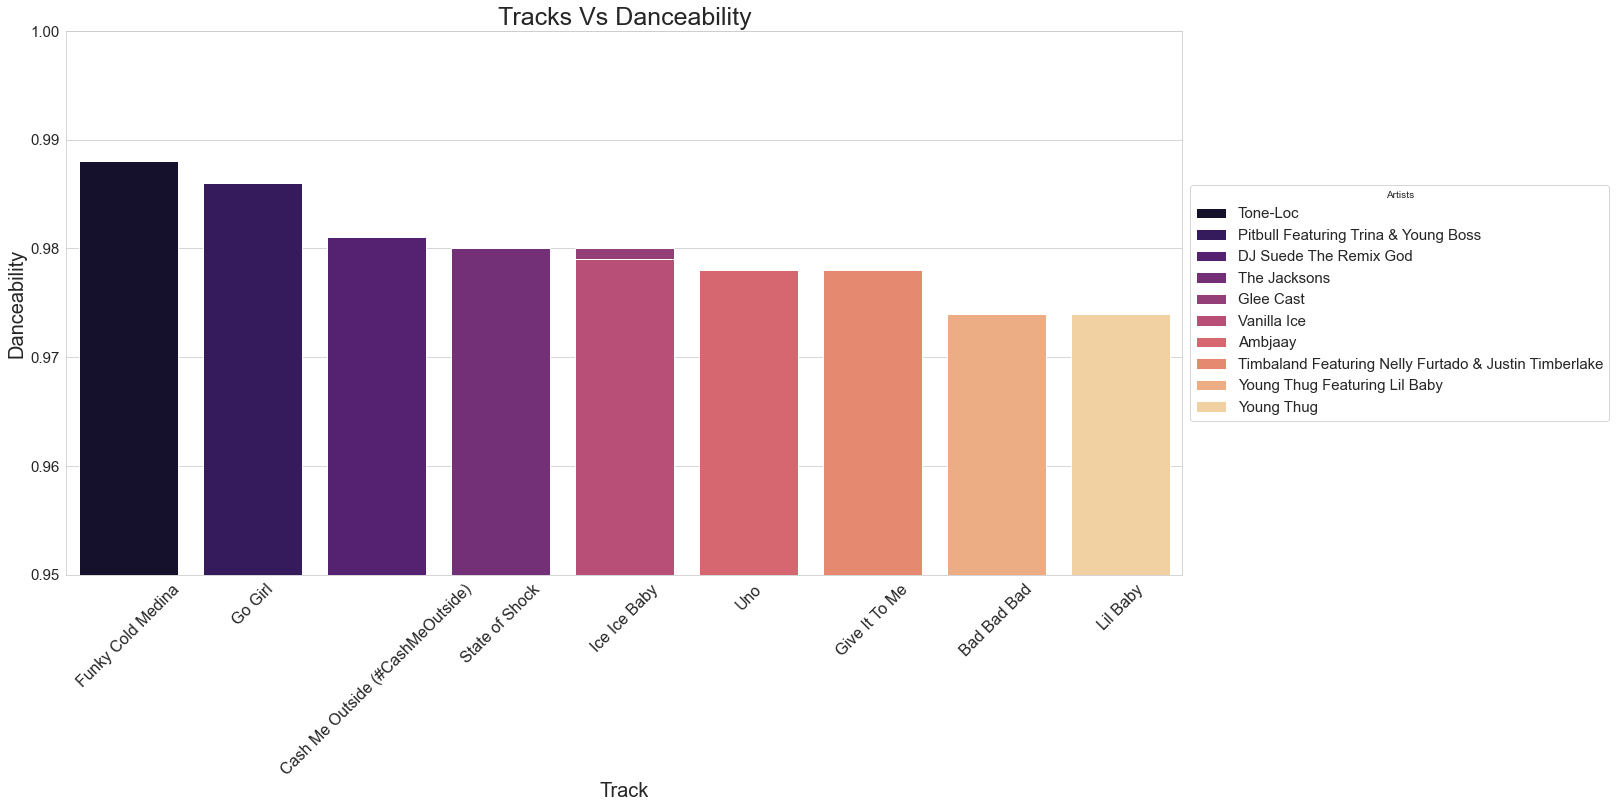

In [18]:

df_temp=all_data[(all_data['danceability']>0.9) & 
                 (all_data['target']==1)].sort_values(by='danceability',ascending=False).head(10)

df_temp['artist']=df_temp['artist'].str.replace('$','s',regex=True)

plt.figure(figsize=(20,10))

g=sns.barplot(x=df_temp['track'],y=df_temp['danceability'],data=df_temp,palette='magma',hue='artist',dodge=False)
g.legend(title='Artists',loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
plt.rcParams['legend.title_fontsize'] = 15
plt.xlabel('Track',fontsize=20)
plt.ylabel('Danceability',fontsize=20)
plt.ylim(0.95,1)
plt.xticks(fontsize=16,rotation=45)
plt.yticks(fontsize=15)
plt.title('Tracks Vs Danceability',fontsize=25)
plt.show()



## Energy:

* <b>Energy factor has a relatively mild positive correlation with target, time signature, tempo and valence whereas it exhibits a very strong positive correlation with loudness.</b>

* <b>Energy factor has a mild negative correlation with instrumentalness and a very strong negative correlation with acousticness while it remains unaffected by most of the other factors like song key,song mode etc.</b>





### Mild Positive Correlations

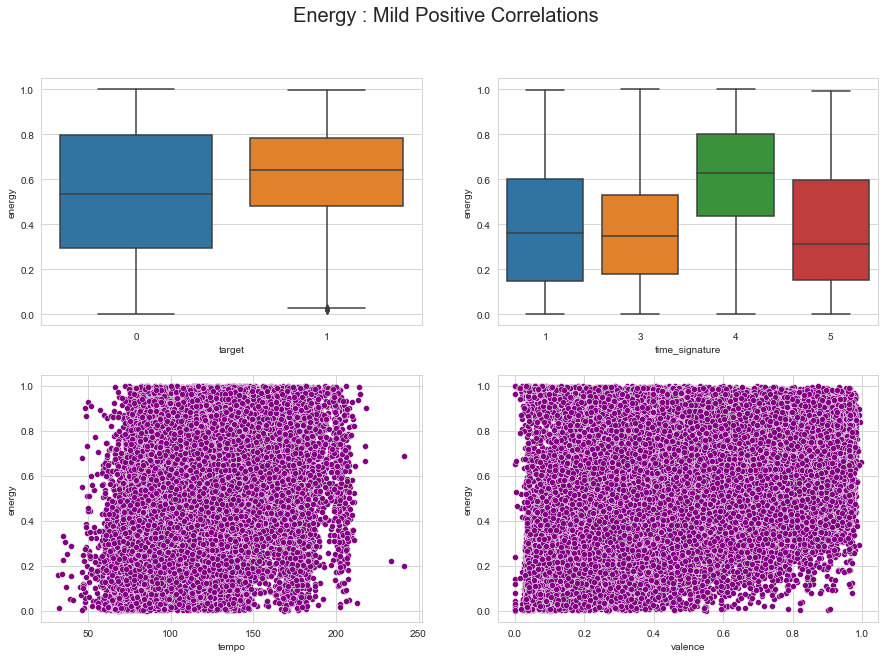

In [19]:
figure,axes= plt.subplots(2,2,figsize=(15,10))

sns.boxplot(x='target',y='energy',data=all_data,ax=axes[0,0])
sns.boxplot(x='time_signature',y='energy',data=all_data,ax=axes[0,1])
sns.scatterplot(x='tempo',y='energy',data=all_data,ax=axes[1,0],color='purple')
sns.scatterplot(x='valence',y='energy',data=all_data,ax=axes[1,1],color='purple')

plt.suptitle('Energy : Mild Positive Correlations',fontsize=20)

                

plt.show()

### Insights:

* <b> Songs having a higher median energy is more likely to be a hit.</b>

* <b> Songs set in 4/4 time signature have a higher median energy when compared to other time signatures.  </b>

* <b> Even though the heatmap showed a mid positive correlation between energy and tempo, there seems to be no conclusive proof for the same from the scatter plot.</b>

* <b> Setting the mood of the song to a more happy, cheerful and euphoric vibe will likely increase the overall energy of the song.</b>




### Strong Positive Correlation

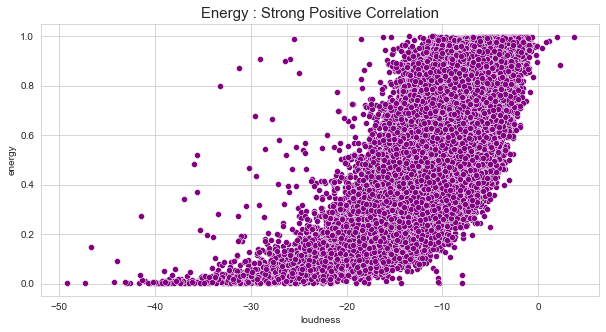

In [20]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='loudness',y='energy',data=all_data,color='purple')
plt.title('Energy : Strong Positive Correlation',fontsize=15,loc='center')
plt.show()

### Insights:

* <b> Increasing the loudness of the song will most certainly increase the energy of the song in an exponential way.</b>

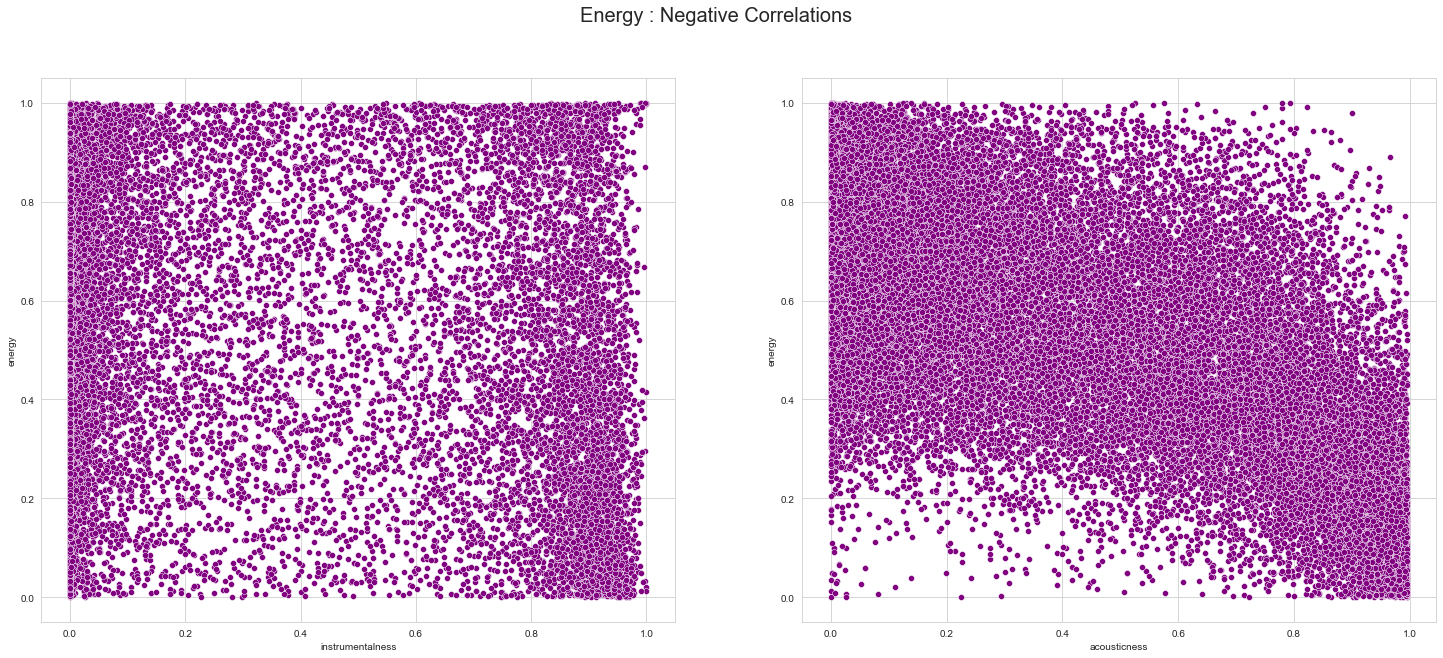

In [21]:
figure,axes= plt.subplots(1,2,figsize=(25,10))


sns.scatterplot(x='instrumentalness',y='energy',data=all_data,ax=axes[0],color='purple')
sns.scatterplot(x='acousticness',y='energy',data=all_data,ax=axes[1],color='purple')

plt.suptitle('Energy : Negative Correlations',fontsize=20)

                

plt.show()

### Insights:


* <b> Even though the heatmap showed a mild negative correlation between instrumentalness and energy, there seems to be no conclusive proof for the same from the scatter plot.</b>

* <b> The energy of the song drops with increasing acousticness. So, if you wish to have a song with higher energy, reducing the acoustic instrumental parts would definitely be helpful.</b>





### Top Hit Songs with Highest Energy

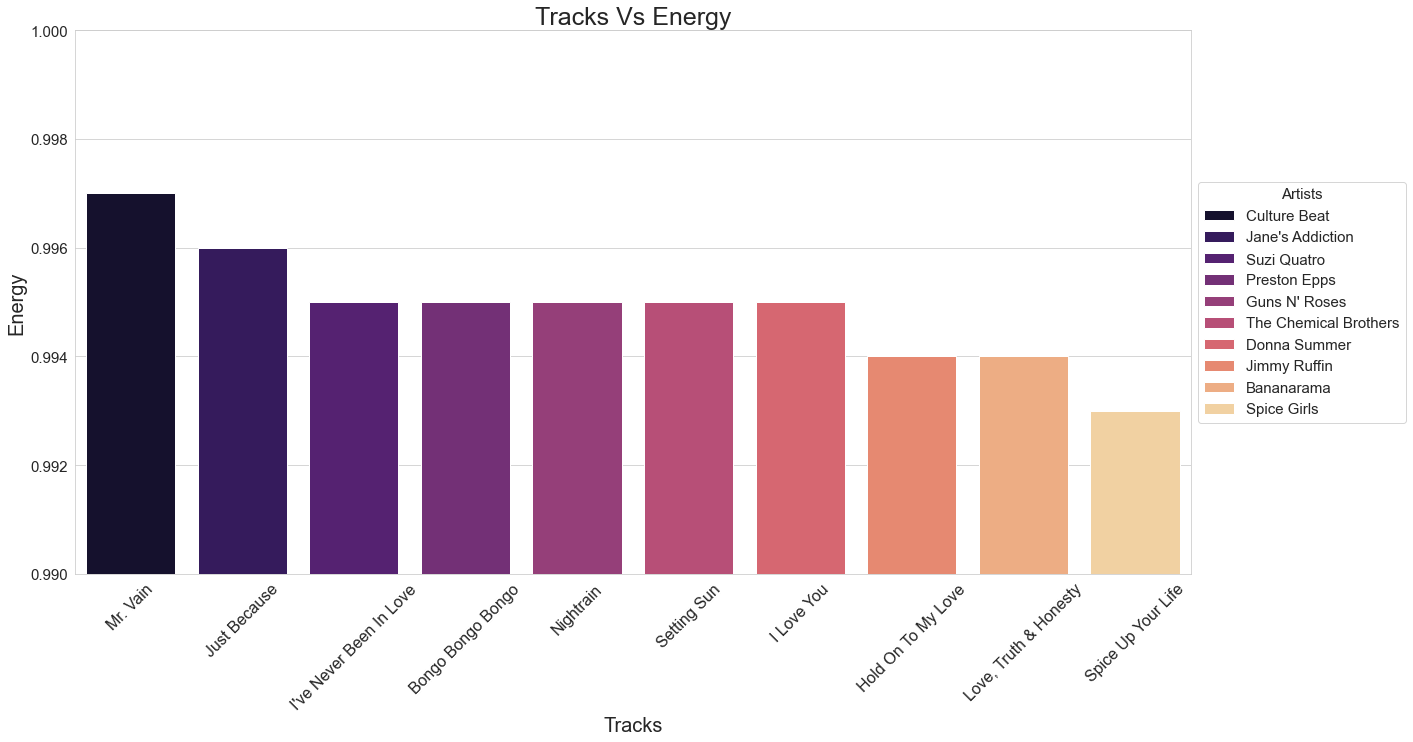

In [22]:

df_temp=all_data[(all_data['energy']>0.5) & 
                 (all_data['target']==1)].sort_values(by='energy',ascending=False).head(10)

plt.figure(figsize=(20,10))

g=sns.barplot(x=df_temp['track'],y=df_temp['energy'],data=df_temp,palette='magma',hue='artist',dodge=False)
g.legend(title='Artists',loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
plt.rcParams['legend.title_fontsize'] = 15
plt.xlabel('Tracks',fontsize=20)
plt.ylabel('Energy',fontsize=20)
plt.ylim(0.99,1)
plt.xticks(fontsize=16,rotation=45)
plt.yticks(fontsize=15)
plt.title('Tracks Vs Energy',fontsize=25)
plt.show()

## Loudness

* <b>Loudness has a mild positive correlation with danceability and a very strong positive correlation with energy as discussed and shown earlier.</b>

* <b>It also has a mild positive correlation with the target value and the valence values (mood) of the song.</b>

* <b>Loudness has a mild negative correlation with instrumentalness and a relatively significant negative correlation with acousticness.</b>







### Mild Positive Correlations

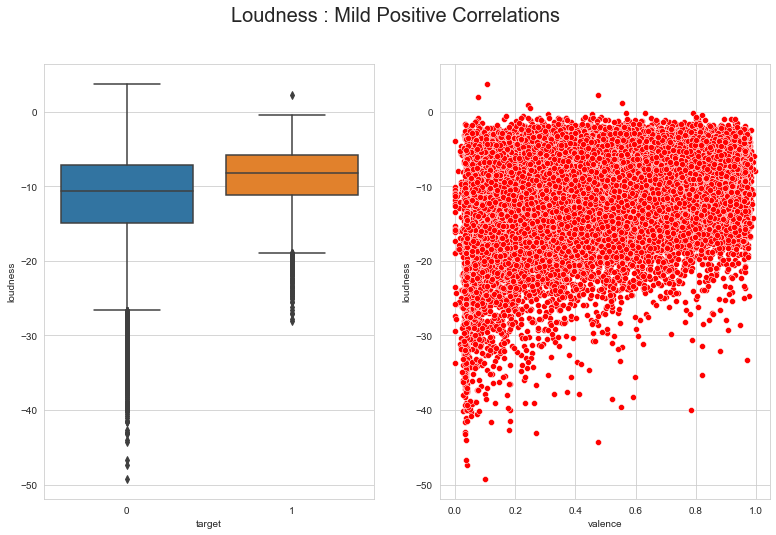

In [23]:
figure,axes= plt.subplots(1,2,figsize=(13,8))

sns.boxplot(x='target',y='loudness',data=all_data,ax=axes[0])
sns.scatterplot(x='valence',y='loudness',data=all_data,ax=axes[1],color='red')


plt.suptitle('Loudness : Mild Positive Correlations',fontsize=20)

                

plt.show()

### Insights:


* <b> Songs having an overall higher loudness levels are more likely to be a hit. </b>

* <b> It is also interesting to note that songs with higher valence values (more cheerful/happy mood) tend to be more loud.</b>







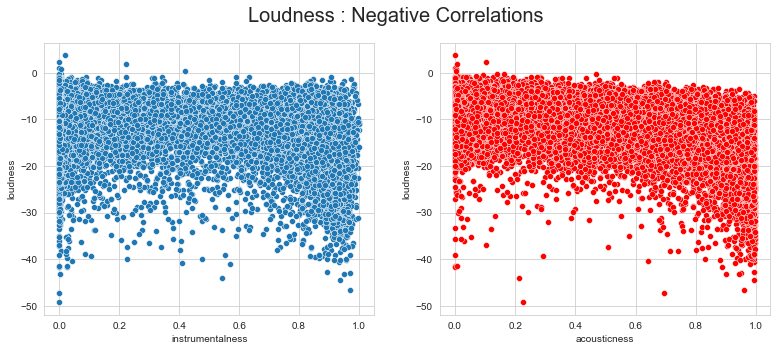

In [24]:
figure,axes= plt.subplots(1,2,figsize=(13,5))

sns.scatterplot(x='instrumentalness',y='loudness',data=all_data,ax=axes[0])
sns.scatterplot(x='acousticness',y='loudness',data=all_data,ax=axes[1],color='red')


plt.suptitle('Loudness : Negative Correlations',fontsize=20)

                

plt.show()

### Insights:

* <b>Songs which are more or less solely instrumental pieces tend to have a lower loudness value overall.</b>

* <b> The loudness of the song drops with increasing acousticness. So, if you wish to have a song with higher loudness, reducing the parts of acoustic instruments will help.</b>




### Top Hit Songs with Highest Loudness Levels

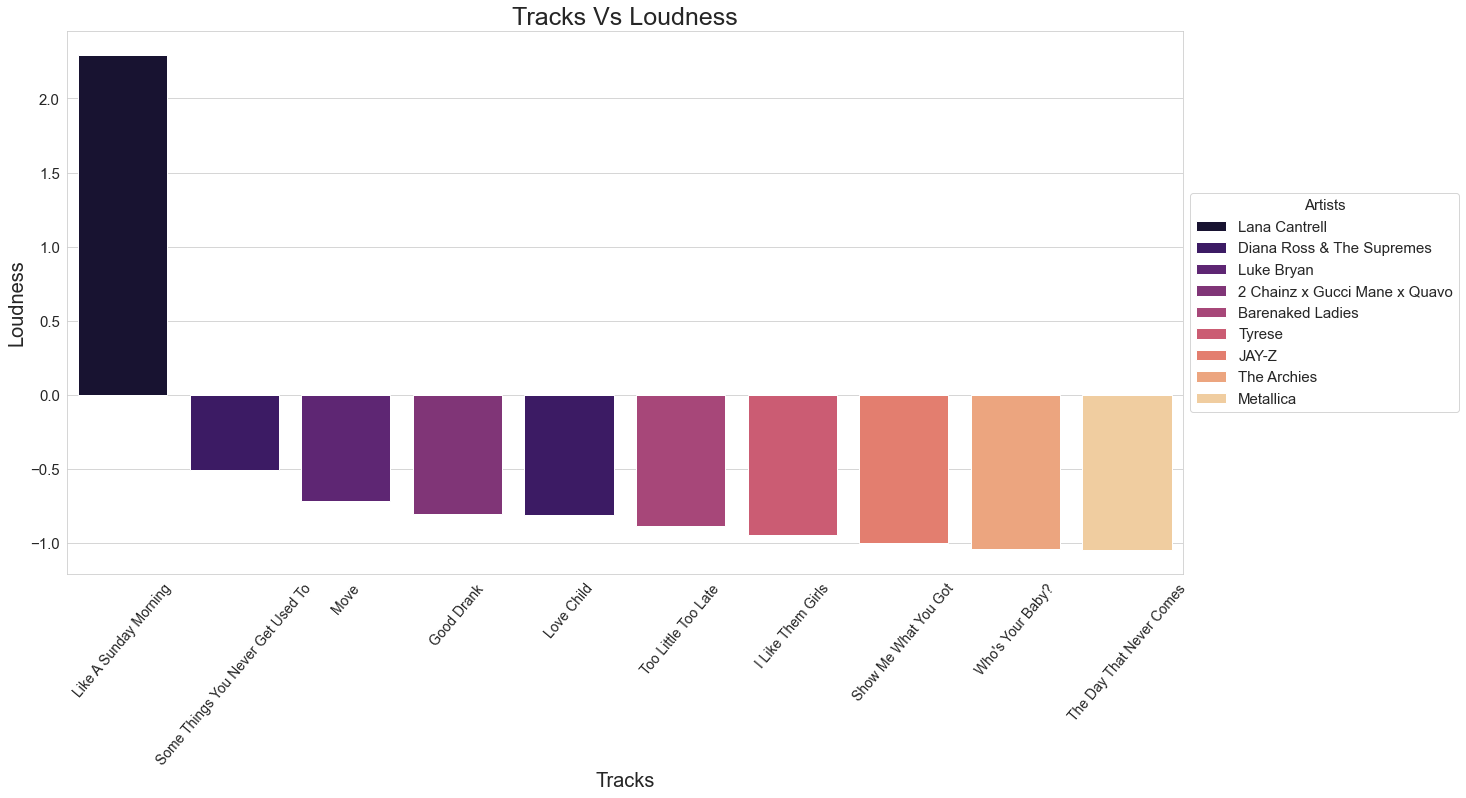

In [25]:

df_temp=all_data[(all_data['loudness']>-10) & 
                 (all_data['target']==1)].sort_values(by='loudness',ascending=False).head(10)

plt.figure(figsize=(20,10))

g=sns.barplot(x=df_temp['track'],y=df_temp['loudness'],data=df_temp,palette='magma',hue='artist',dodge=False)
g.legend(title='Artists',loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
plt.rcParams['legend.title_fontsize'] = 15
plt.xlabel('Tracks',fontsize=20)
plt.ylabel('Loudness',fontsize=20)
plt.xticks(fontsize=14,rotation=50)
plt.yticks(fontsize=15)
plt.title('Tracks Vs Loudness',fontsize=25)
plt.show()

## Acousticness

* <b> Besides the association of acousticness with other factors as discussed earlier, it has a mild positive correlation with instrumentalness</b>






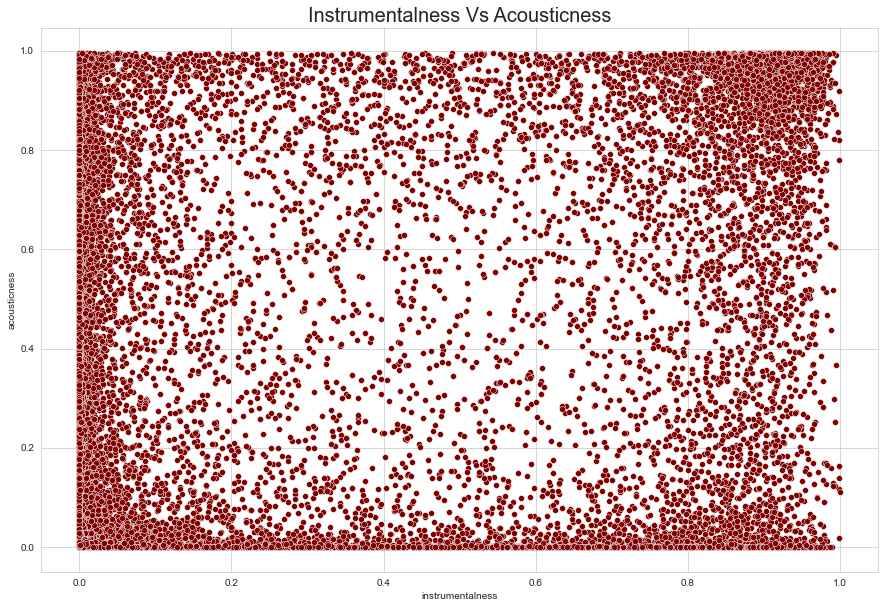

In [26]:
plt.figure(figsize=(15,10))
sns.scatterplot(y='acousticness',x='instrumentalness',data=all_data,color='maroon')

plt.title('Instrumentalness Vs Acousticness',fontsize=20)

plt.show()

### Insight:


* <b> For higher values of instrumentalness, it can be seen that the density of points is relatively more on higher values of acousticness. This means that the songs which are more or less solely instrumental pieces tend to use more of acoustic instrument parts and vice versa.</b>







### Top Hit Songs with Highest Acousticness

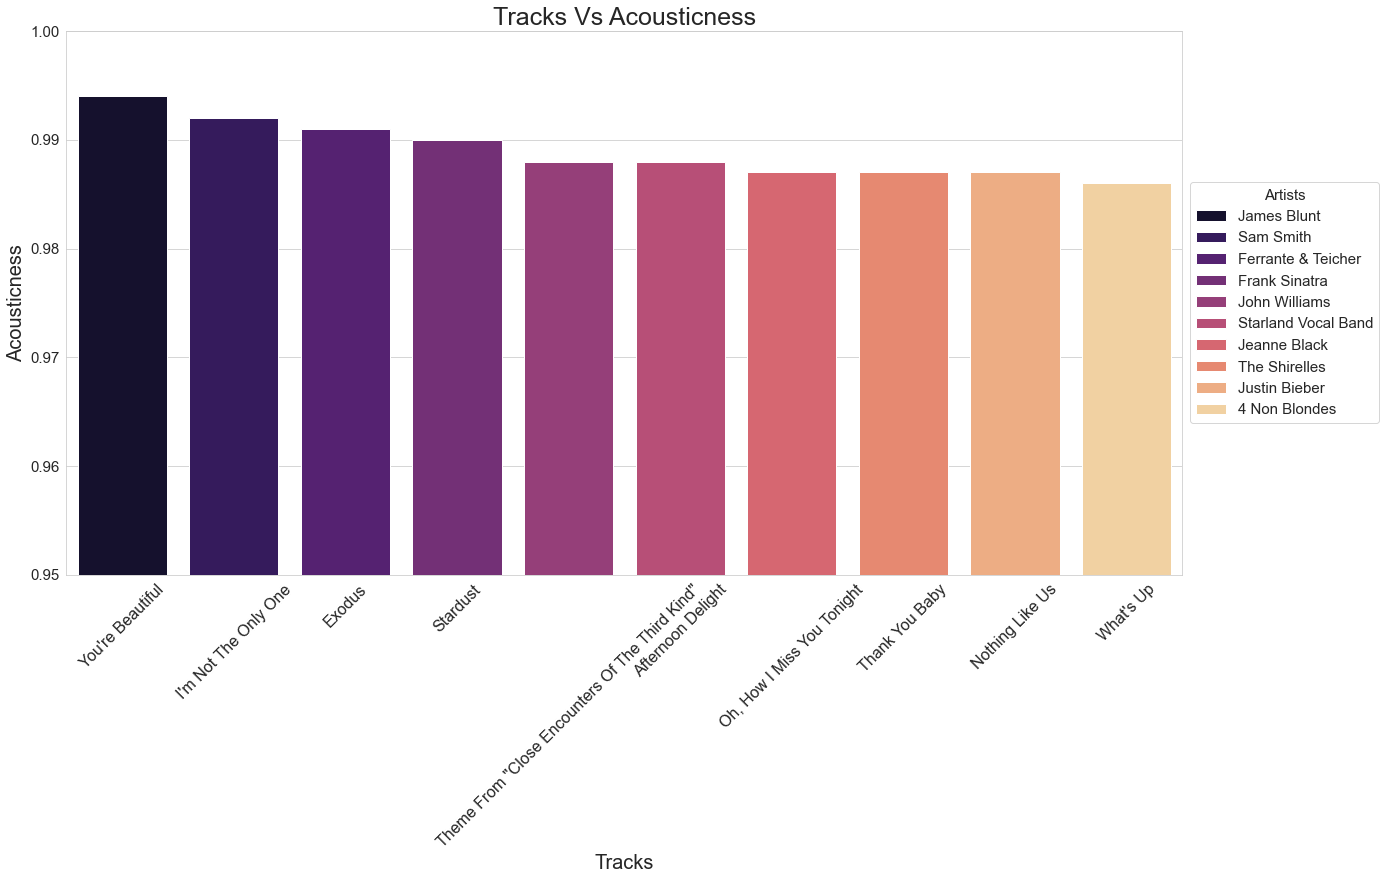

In [27]:

df_temp=all_data[(all_data['acousticness']>0.5) & 
                 (all_data['target']==1)].sort_values(by='acousticness',ascending=False).head(10)

plt.figure(figsize=(20,10))

g=sns.barplot(x=df_temp['track'],y=df_temp['acousticness'],data=df_temp,palette='magma',hue='artist',dodge=False)
g.legend(title='Artists',loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
plt.rcParams['legend.title_fontsize'] = 15
plt.xlabel('Tracks',fontsize=20)
plt.ylabel('Acousticness',fontsize=20)
plt.ylim(0.95,1)
plt.xticks(fontsize=16,rotation=45)
plt.yticks(fontsize=15)
plt.title('Tracks Vs Acousticness',fontsize=25)
plt.show()

## Valence

* <b> Besides the association of valence values with other factors as discussed earlier, it has a mild negative correlation with instrumentalness.</b>



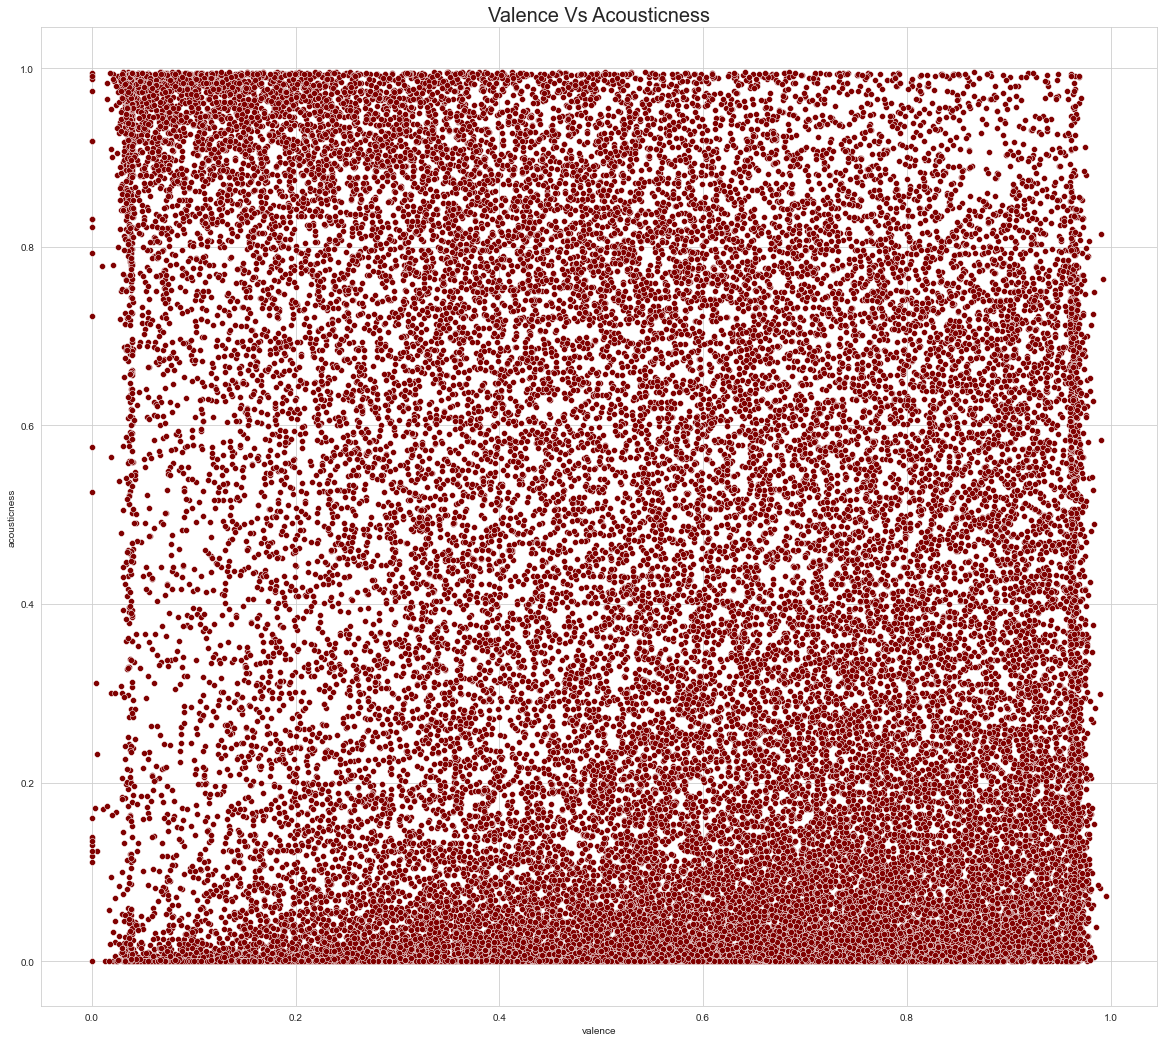

In [28]:
plt.figure(figsize=(20,18))
sns.scatterplot(x='valence',y='acousticness',data=all_data,color='maroon')

plt.title('Valence Vs Acousticness',fontsize=20)

plt.show()

### Insight:

* <b> It is interesting to note that, for higher values of valence factor, the density of points is relatively more on the lower values of acousticness and vice versa. This means that the songs which are more cheerful and euphoric tend to have lesser acoustic instrument parts when compared to songs which are more emotional and sad (lower valence values).</b>




### Top Hit Songs with Highest Valence Values

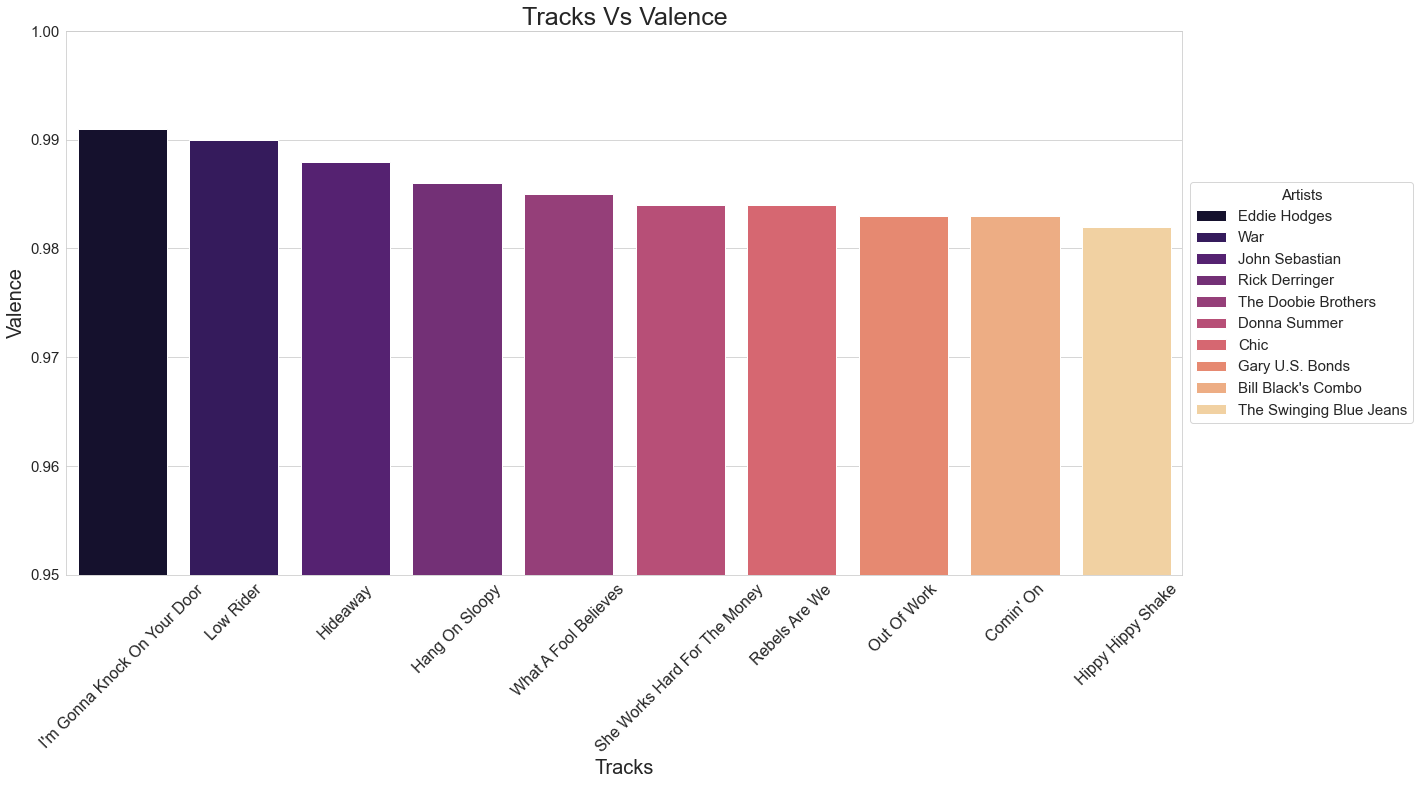

In [29]:

df_temp=all_data[(all_data['valence']>0.5) & 
                 (all_data['target']==1)].sort_values(by='valence',ascending=False).head(10)

plt.figure(figsize=(20,10))

g=sns.barplot(x=df_temp['track'],y=df_temp['valence'],data=df_temp,palette='magma',hue='artist',dodge=False)
g.legend(title='Artists',loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
plt.rcParams['legend.title_fontsize'] = 15
plt.xlabel('Tracks',fontsize=20)
plt.ylabel('Valence',fontsize=20)
plt.ylim(0.95,1)
plt.xticks(fontsize=16,rotation=45)
plt.yticks(fontsize=15)
plt.title('Tracks Vs Valence',fontsize=25)
plt.show()

## Sections

* <b>As expected, the number of sections of a song has a strongest positive correlation with song duration.</b>




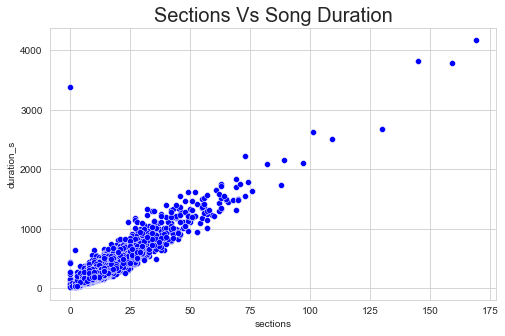

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='sections',y='duration_s',data=all_data,color='blue',)

plt.title('Sections Vs Song Duration',fontsize=20)

plt.show()

### Insight:

* <b> As the number of song sections increases, the song duration also increases accordingly.</b>

### Top Hit Songs with Highest Number of Sections

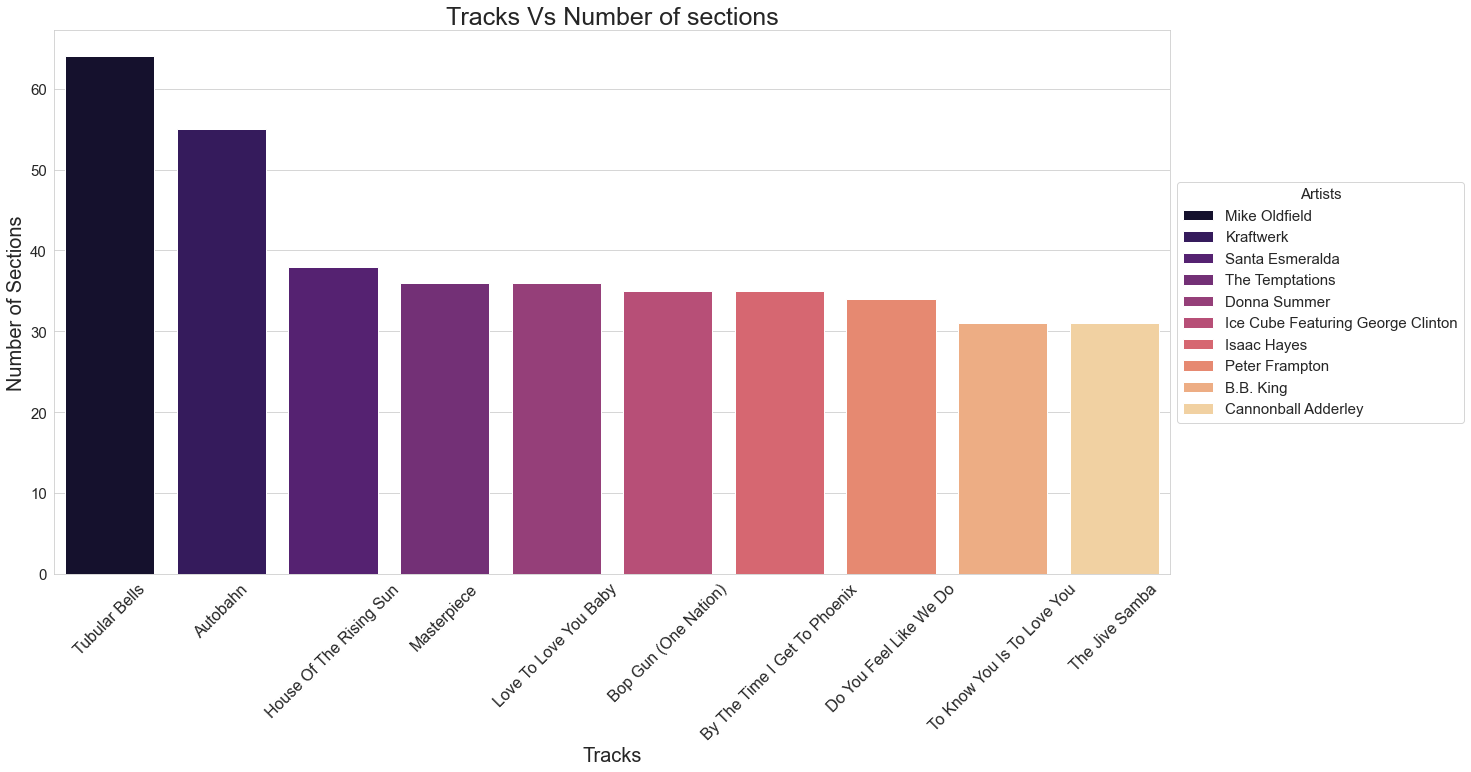

In [31]:

df_temp=all_data[(all_data['sections']>10) & 
                 (all_data['target']==1)].sort_values(by='sections',ascending=False).head(10)

plt.figure(figsize=(20,10))

g=sns.barplot(x=df_temp['track'],y=df_temp['sections'],data=df_temp,palette='magma',hue='artist',dodge=False)
g.legend(title='Artists',loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
plt.rcParams['legend.title_fontsize'] = 15
plt.xlabel('Tracks',fontsize=20)
plt.ylabel('Number of Sections',fontsize=20)
plt.xticks(fontsize=16,rotation=45)
plt.yticks(fontsize=15)
plt.title('Tracks Vs Number of sections',fontsize=25)
plt.show()

  ### Factors like song key, mode, liveness and chorus hit have all their correlation values around zero; which means they do not have any significant impact on other factors and vice versa.

# Target

* <b> Target is the most important value as it denotes if the song is a hit or an unsuccessful one.</b>

* <b> Features like time signature, energy, valence, loudness and danceability have mild to strong correlations with target respectively.</b>

* <b> Features like acousticness and instrumentalness have mild to strong negative correlations with target respectively.</b>






### Positive Correlations

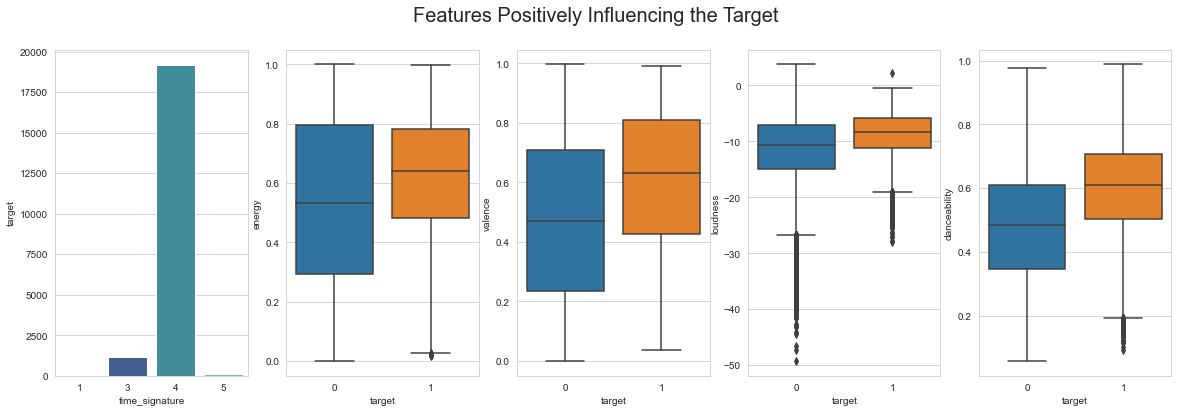

In [32]:
figure,axes= plt.subplots(1,5,figsize=(20,6))

# Finding the number of hit songs with respect to time signature
df_temp=all_data.groupby('time_signature').sum()['target'] 
df_temp=df_temp.reset_index()

# Plotting all the data
sns.barplot(x='time_signature',y='target',data=df_temp,ax=axes[0],palette='mako')
sns.boxplot(x='target',y='energy',data=all_data,ax=axes[1])
sns.boxplot(x='target',y='valence',data=all_data,ax=axes[2])
sns.boxplot(x='target',y='loudness',data=all_data,ax=axes[3])
sns.boxplot(x='target',y='danceability',data=all_data,ax=axes[4])


plt.suptitle('Features Positively Influencing the Target',fontsize=20)

                

plt.show()

### Insights:

* <b> Songs set in 4/4 time signature are more likely to be a hit.</b>

* <b> Songs having a higher median energy are more likely to be a hit.  </b>

* <b> Songs that are more happy, cheerful and euphoric in nature (valence feature) are more likely to be a hit.</b>

* <b> Songs that have a higher overall loudness levels are more likely to be a hit.</b>

* <b> Songs that have higher danceability factor are more likely to be a hit.</b>


### Negative Correlations

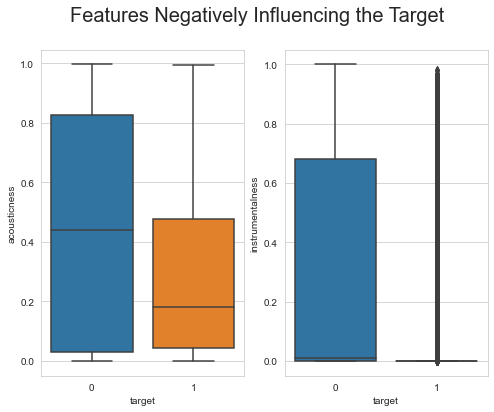

In [33]:
figure,axes= plt.subplots(1,2,figsize=(8,6))

sns.boxplot(x='target',y='acousticness',data=all_data,ax=axes[0])
sns.boxplot(x='target',y='instrumentalness',data=all_data,ax=axes[1])

plt.suptitle('Features Negatively Influencing the Target',fontsize=20)

plt.show()

### Insights:

* <b> Songs that have higher acousticness (higher number of acoustic instruments and parts) are less likely to be a hit. Hence, reducing the acousticness improves its chances of being a hit. </b>

* <b> Songs that are more or less only instrumental pieces are less likely to be a hit. Hence, reducing the instrumentalness and adding a bit of speechiness improves its chances of being a hit.</b>


## Conclusion

<b>Overall, the analytical project was successful in providing useful insights on various factors which influence a song in becoming a hit and their interdependencies which is very much in line with the objective of the study. The project could also uncover certain hidden insights which helped to debunk several prenotions that could have been misleading. Furthermore, the study also proved to be useful in  presenting important strategies and methodologies that could help artists orient their creative inputs in line with the insights derived so that their songs are more likely to become successful.</b>